In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps= PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('Phishing_Email.csv')
df=df.head(5000)

In [3]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

Email Text      Email Type
0     re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email
1     the other side of * galicismos * * galicismo *...      Safe Email
2     re : equistar deal tickets are you still avail...      Safe Email
3     \nHello I am your hot lil horny toy.\n    I am...  Phishing Email
4     software at incredibly low prices ( 86 % lower...  Phishing Email
...                                                 ...             ...
4995  I noticed a drop in checks, and did some tests...      Safe Email
4996  >>>>> "U" == Udhay Shankar N  writes:    U> At...      Safe Email
4997  i will be out next week imbalances : i would l...      Safe Email
4998  re : first delivery - wagner oil vance , deal ...      Safe Email
4999  Once upon a time, Peter wrote :> On Fri, Feb 0...      Safe Email

[5000 rows x 2 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  4992 non-null   object
 1   Email Type  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


#### Checking for NULL values

In [5]:
nan_count = df.isna().sum()
print(nan_count)

Email Text    8
Email Type    0
dtype: int64


In [6]:
df.dropna(inplace=True)  # Drop rows with NaN values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  4992 non-null   object
 1   Email Type  4992 non-null   object
dtypes: object(2)
memory usage: 117.0+ KB


In [8]:
# Cheking Counts of Phishing Email and a Normal Email
df['Email Type'].value_counts()

Email Type
Safe Email        3003
Phishing Email    1989
Name: count, dtype: int64

<Axes: xlabel='Email Type', ylabel='count'>

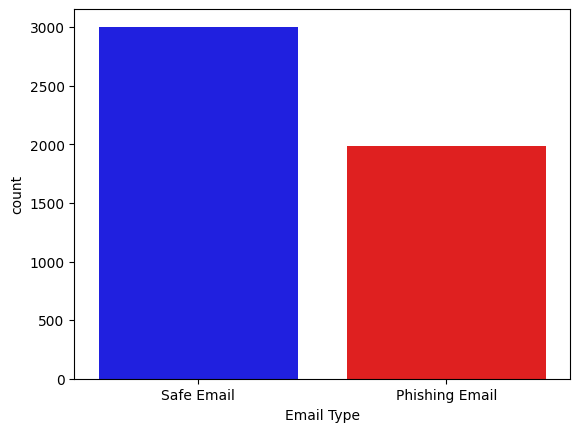

In [9]:
sns.countplot(x='Email Type', hue='Email Type', data=df, palette=['Blue', 'Red'])

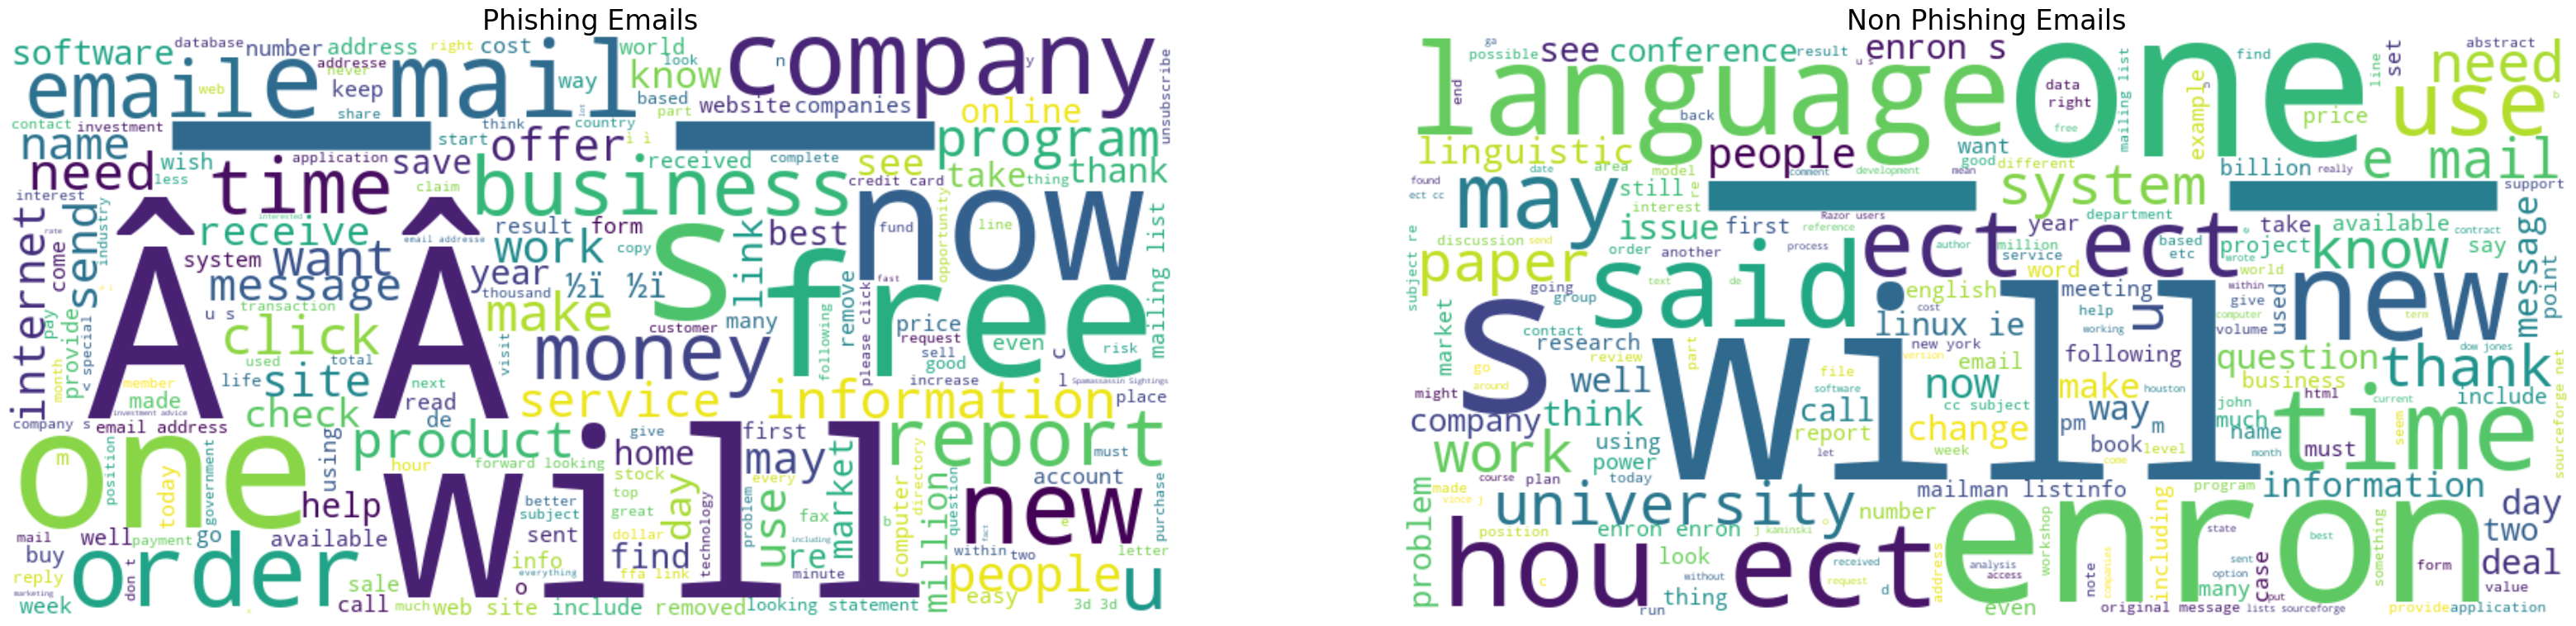

In [11]:
phishing_texts = df[df['Email Type'] == 'Phishing Email']['Email Text'].dropna().tolist()
non_phishing_texts = df[df['Email Type'] == 'Safe Email']['Email Text'].dropna().tolist()

phishing_text = ' '.join(phishing_texts)
non_phishing_text = ' '.join(non_phishing_texts)

# Generate word clouds
phishing_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_text)
non_phishing_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_phishing_text)

plt.figure(figsize=(40, 20))
plt.subplot(1, 2, 1)
plt.imshow(phishing_wordcloud, interpolation='bilinear')
plt.title('Phishing Emails', size=24)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_phishing_wordcloud, interpolation='bilinear')
plt.title('Non Phishing Emails', size=24)
plt.axis('off')

plt.show()

In [10]:
df['length of Email']=df['Email Text'].apply(len)
df

Email Text      Email Type  \
0     re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email   
1     the other side of * galicismos * * galicismo *...      Safe Email   
2     re : equistar deal tickets are you still avail...      Safe Email   
3     \nHello I am your hot lil horny toy.\n    I am...  Phishing Email   
4     software at incredibly low prices ( 86 % lower...  Phishing Email   
...                                                 ...             ...   
4995  I noticed a drop in checks, and did some tests...      Safe Email   
4996  >>>>> "U" == Udhay Shankar N  writes:    U> At...      Safe Email   
4997  i will be out next week imbalances : i would l...      Safe Email   
4998  re : first delivery - wagner oil vance , deal ...      Safe Email   
4999  Once upon a time, Peter wrote :> On Fri, Feb 0...      Safe Email   

      length of Email  
0                1030  
1                 479  
2                1245  
3                 688  
4                 441  
...               ...  
4995              611  
4996              546  
4997             2967  
4998             2863  
4999             1109  

[4992 rows x 3 columns]

In [11]:
df.iloc[df['length of Email'].idxmax()][0]

/tmp/ipykernel_3991/4069915760.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[df['length of Email'].idxmax()][0]


'6th intl . symposium on social communication ( cuba ) sixth international symposium on social communication santiago de cuba january 25-28 , 1999 the applied linguistics centre of ministry of science , technology and environment in santiago de cuba , is pleased to announce the sixth international symposium on social communication to be held in santiago de cuba , january 25th - 28th , 1999 . this international event will focus on social communication processes from the points of view of applied linguistics , computational linguistics , cybernetics , medicine , ethnology , folklore and mass media studies . the symposium will be also sponsored by : . . university of oriente , cuba . . higher institute for medical sciences , santiago de cuba . . information for development agency , citma , cuba . . humboldt university , germany . . university of twente , the netherlands . . national council of researchs , italy . . linguists association of cuba papers and posters will be discussed within 

In [12]:
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
def evaluate(model, x_test, y_test):
    model_name = "RandomForestClassifier"
    le = LabelEncoder()
    y_test = le.fit_transform(y_test)  # Transform y_test to numerical labels
    y_prob = model.predict_proba(x_test)[:, 1]
    y_pred = model.predict(x_test)
    y_pred = le.transform(y_pred)  # Transform y_pred to numerical labels

    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    print("Accuracy Score=", accuracy_score(y_test, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("Classification Report\n", classification_report(y_test, y_pred))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()
    
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f'{model_name} ROC AUC: {roc_auc:.2f}')


## 2 Without Stemming

In [14]:
corpus = []

for i in range(len(df)):
    s = re.sub('[^a-zA-Z]', " ", df['Email Text'].iloc[i])
    s = s.lower()
    s =s.split()
    s =[(word) for word in s if not word in set(all_stopwords)]
    s =  " ".join(s)
    corpus.append(s)

corpus

['disc uniformitarianism sex lang dick hudson observations us use not aughter vocative thought provoking not sure fair attribute sons treated like senior relatives one thing n normally use brother way aughter hard imagine natural class comprising senior relatives excluding brother another seem differences not imagining distinction not seems senior relative terms used wider variety contexts e g calling distance get someone attention hence beginning utterance whereas seems natural utterances like yes son hand son ones like son son help although perhaps latter ones not completely impossible alexis mr',
 'side galicismos galicismo spanish term names improper introduction french words spanish sounding thus deceptive ear galicismo often considered barbarismo would term designates opposite phenomenon unlawful words spanish origin may crept french someone provide examples thank joseph kozono kozonoj gunet georgetown edu',
 'equistar deal tickets still available assist robert entering new deal 

In [15]:
cv=CountVectorizer()
cv.fit_transform(corpus).toarray().shape

(4992, 62639)

In [16]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
x=cv.fit_transform(corpus).toarray()
y=df['Email Type']

In [18]:
print("Number of samples in x:", len(x))
print("Number of samples in y", len(y))

Number of samples in x: 4992
Number of samples in y 4992


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
x_train.shape ,x_test.shape

((3993, 62639), (999, 62639))

In [21]:
y_train.shape , y_test.shape

((3993,), (999,))

In [22]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=model.predict(x_test)
y_pred

array(['Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Phishing Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Phishing Email', 'Phishing Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email

In [24]:
y_test.values

array(['Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Phishing Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Phishing Email', 'Phishing Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email

### Model Evaluation

Accuracy Score= 0.9469469469469469
Confusion Matrix: 
 [[402  20]
 [ 33 544]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       422
           1       0.96      0.94      0.95       577

    accuracy                           0.95       999
   macro avg       0.94      0.95      0.95       999
weighted avg       0.95      0.95      0.95       999



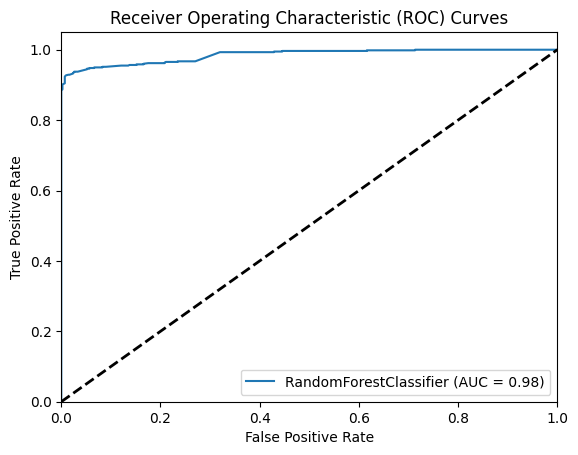

RandomForestClassifier ROC AUC: 0.98


In [25]:
evaluate(model,x_test,y_test)

#### With Stemming


In [14]:
corpus = []

for i in range(len(df)):
    s = re.sub('[^a-zA-Z]', " ", df['Email Text'].iloc[i])
    s = s.lower()
    s =s.split()
    s =[ps.stem(word) for word in s if not word in set(all_stopwords)]
    s =  " ".join(s)
    corpus.append(s)

corpus

['disc uniformitarian sex lang dick hudson observ us use not aughter voc thought provok not sure fair attribut son treat like senior rel one thing n normal use brother way aughter hard imagin natur class compris senior rel exclud brother anoth seem differ not imagin distinct not seem senior rel term use wider varieti context e g call distanc get someon attent henc begin utter wherea seem natur utter like ye son hand son one like son son help although perhap latter one not complet imposs alexi mr',
 'side galicismo galicismo spanish term name improp introduct french word spanish sound thu decept ear galicismo often consid barbarismo would term design opposit phenomenon unlaw word spanish origin may crept french someon provid exampl thank joseph kozono kozonoj gunet georgetown edu',
 'equistar deal ticket still avail assist robert enter new deal ticket equistar talk bryan hull anita luong kyle decid need addit sale ticket addit buyback ticket set forward tina valadez hou ect pm robert e 

In [15]:
cv=CountVectorizer()
cv.fit_transform(corpus).toarray().shape

(4992, 49125)

In [16]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
x=cv.fit_transform(corpus).toarray()
y=df['Email Type']

In [18]:
print("Number of samples in x:", len(x))
print("Number of samples in y", len(y))

Number of samples in x: 4992
Number of samples in y 4992


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
x_train.shape ,x_test.shape

((3993, 49125), (999, 49125))

In [21]:
y_train.shape , y_test.shape

((3993,), (999,))

## Training Model

In [22]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=model.predict(x_test)
y_pred

array(['Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Phishing Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Phishing Email', 'Phishing Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe

In [24]:
y_test.values

array(['Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Phishing Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Phishing Email', 'Safe Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Safe Email',
       'Phishing Email', 'Phishing Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Phishing Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Phishing Email', 'Safe Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email

## Model Evaluation

Accuracy Score= 0.944944944944945
Confusion Matrix: 
 [[395  27]
 [ 28 549]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       422
           1       0.95      0.95      0.95       577

    accuracy                           0.94       999
   macro avg       0.94      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999



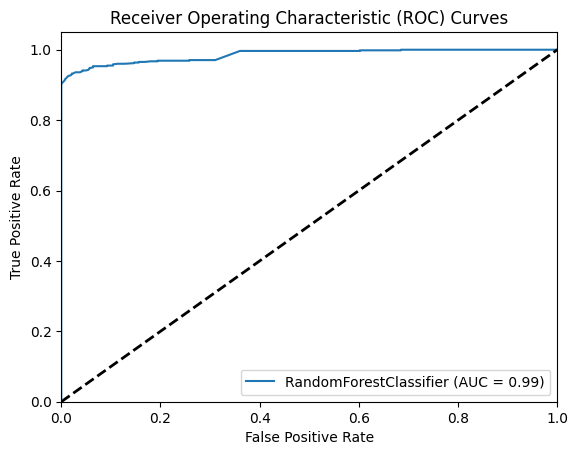

RandomForestClassifier ROC AUC: 0.99


In [25]:
evaluate(model,x_test,y_test)

In [2]:
def train_model():
    df=pd.read_csv('Phishing_Email.csv')
    df=df.head(5000)

    df.drop(columns=df.columns[0], axis=1, inplace=True)

    le = LabelEncoder()
    df['Email Type'] = le.fit_transform(df['Email Type'])
    df.dropna(inplace=True)

    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    
    corpus = []

    for i in range(len(df)):
        s = re.sub('[^a-zA-Z]', " ", df['Email Text'].iloc[i])
        s = s.lower()
        s =s.split()
        s =[ps.stem(word) for word in s if not word in set(all_stopwords)]
        s =  " ".join(s)
        corpus.append(s)

    cv=CountVectorizer()
    cv.fit_transform(corpus).toarray().shape
    cv.fit_transform(corpus).toarray()

    x=cv.fit_transform(corpus).toarray()
    y=df['Email Type']
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

    print("Enter choice to select the model")
    m=int(input())
    if(m==1):
        model_name='Logistic Regression'
        model=LogisticRegression()
    elif(m==2):
        model_name='Random Forest Classifier'
        model=RandomForestClassifier()
    elif(m==3):
        model_name='SVM'
        model=SVC(kernel='linear',probability=True)
    else:
        model_name='KNN'
        model=KNeighborsClassifier(n_neighbors=9)
    
    model.fit(x_train, y_train)

    y_prob = model.predict_proba(x_test)[:, 1]
    y_pred=model.predict(x_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    print("Accuracy Score=",accuracy_score(y_test,y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print( "Classification Report\n",classification_report(y_test,y_pred) )
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f'{model_name} ROC AUC: {roc_auc:.2f}')

### Logisitic Regression

Enter choice to select the model
Accuracy Score= 0.9579579579579579
Confusion Matrix: 
 [[410  12]
 [ 30 547]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       422
           1       0.98      0.95      0.96       577

    accuracy                           0.96       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.96      0.96      0.96       999



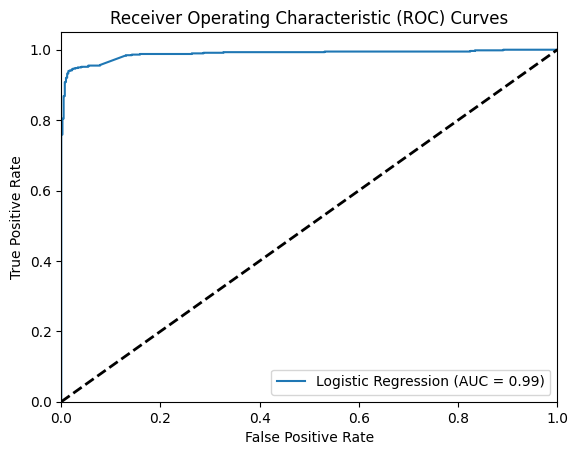

Logistic Regression ROC AUC: 0.99


In [3]:
train_model()

### Random Forest Classifier

Enter choice to select the model
Accuracy Score= 0.94994994994995
Confusion Matrix: 
 [[401  21]
 [ 29 548]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       422
           1       0.96      0.95      0.96       577

    accuracy                           0.95       999
   macro avg       0.95      0.95      0.95       999
weighted avg       0.95      0.95      0.95       999



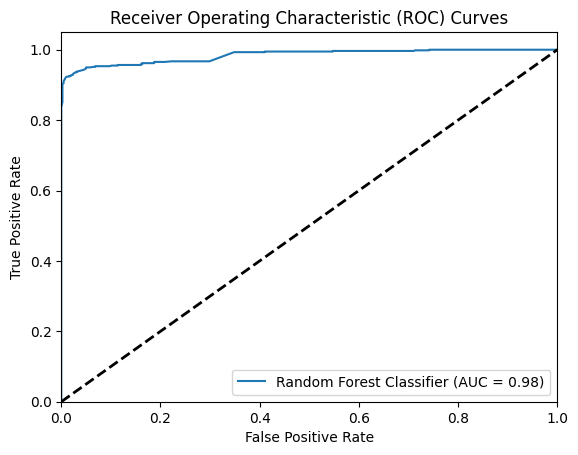

Random Forest Classifier ROC AUC: 0.98


In [3]:
train_model()

### SVM

Enter choice to select the model
Accuracy Score= 0.933933933933934
Confusion Matrix: 
 [[398  24]
 [ 42 535]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       422
           1       0.96      0.93      0.94       577

    accuracy                           0.93       999
   macro avg       0.93      0.94      0.93       999
weighted avg       0.93      0.93      0.93       999



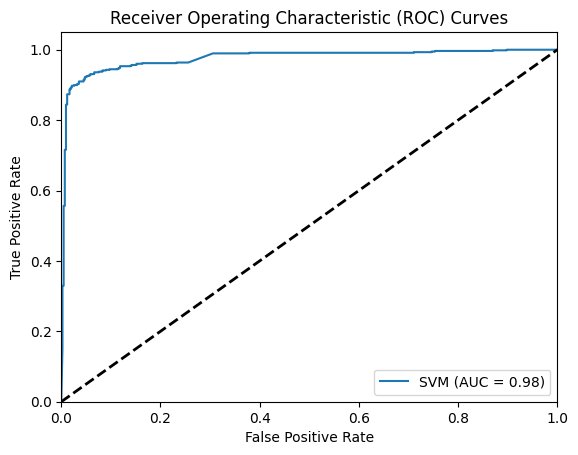

SVM ROC AUC: 0.98


In [3]:
train_model()

### KNN

Enter choice to select the model
Accuracy Score= 0.7687687687687688
Confusion Matrix: 
 [[383  39]
 [192 385]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.91      0.77       422
           1       0.91      0.67      0.77       577

    accuracy                           0.77       999
   macro avg       0.79      0.79      0.77       999
weighted avg       0.81      0.77      0.77       999



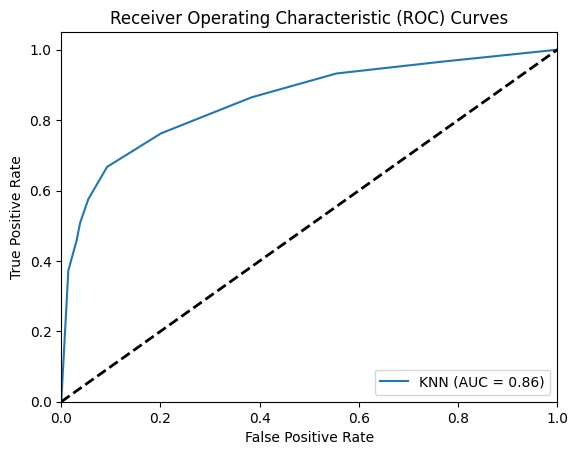

KNN ROC AUC: 0.86


In [3]:
train_model()